<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
import networkx as nx
from sklearn.metrics import f1_score
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
from sklearn.linear_model import SGDClassifier
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [42]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

--2022-03-17 14:40:31--  https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr
Resolving doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-03-17 14:40:31 ERROR 403: Forbidden.



In [43]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/Classroom/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/Classroom/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [44]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees',
       'num_followers_d', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [45]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [46]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

<h2>1. RandomForestClassifier</h2>

Estimators =  10 Train Score 0.8857897795173723 test Score 0.8810337603916293
Estimators =  50 Train Score 0.9076343584121228 test Score 0.9075001088234015
Estimators =  100 Train Score 0.9052496380873598 test Score 0.9055879208396064
Estimators =  250 Train Score 0.9066162653023538 test Score 0.9069134458356016
Estimators =  450 Train Score 0.9075644835889538 test Score 0.907655845708943
best_n_estimators  450


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

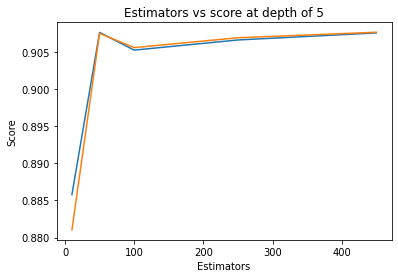

In [47]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)

best_n_estimators = estimators[np.argmax(test_scores)]
print("best_n_estimators ",best_n_estimators)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8932815937558732 test Score 0.8945293466223699
depth =  9 Train Score 0.9204346526621409 test Score 0.9187533468994324
depth =  11 Train Score 0.9231751844242664 test Score 0.921089773747915
depth =  15 Train Score 0.9261752091383922 test Score 0.9233755706301463
best_depth  15


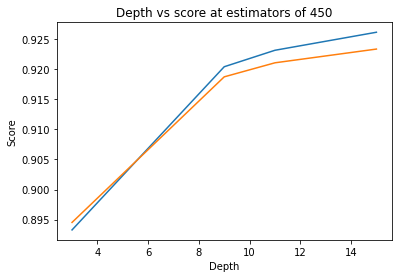

In [48]:
#depths = [3,9,11,15,20,35,50,70,130]
depths = [3,9,11,15]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=best_n_estimators, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)

best_depth = depths[np.argmax(test_scores)]
print("best_depth ",best_depth)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at estimators of ' + str(best_n_estimators))
plt.show()

In [49]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='f1',random_state=25, return_train_score = True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.92331967 0.92628251 0.92088988 0.92273499 0.92727323]
mean train scores [0.92392077 0.92655999 0.92165063 0.92311677 0.92776234]


In [58]:
print(rf_random.best_estimator_)
rf_hyperparameter=rf_random.best_params_

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [59]:
rf_hyperparameter

{'max_depth': 14,
 'min_samples_leaf': 28,
 'min_samples_split': 111,
 'n_estimators': 121}

In [52]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=rf_random.best_params_['max_depth'], max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=rf_random.best_params_['min_samples_leaf'], min_samples_split=rf_random.best_params_['min_samples_split'],
            min_weight_fraction_leaf=0.0, n_estimators=rf_random.best_params_['n_estimators'], n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [53]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [62]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
rf_f1score = f1_score(y_test,y_test_pred)

Train f1 score 0.9299979954211197
Test f1 score 0.9258614836190799


In [55]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


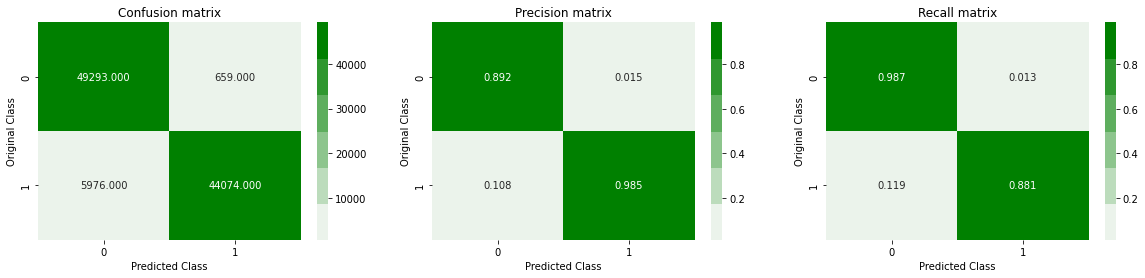

Test confusion_matrix


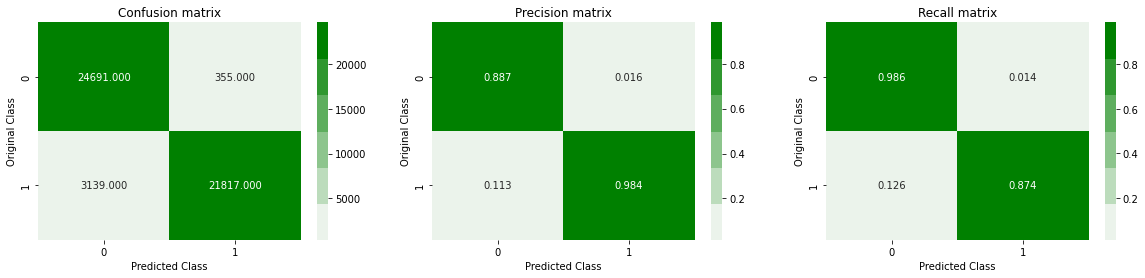

In [60]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

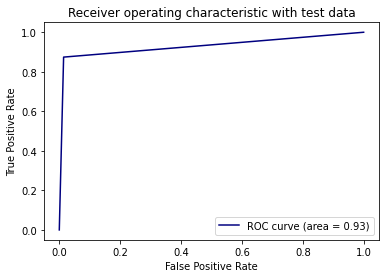

In [61]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

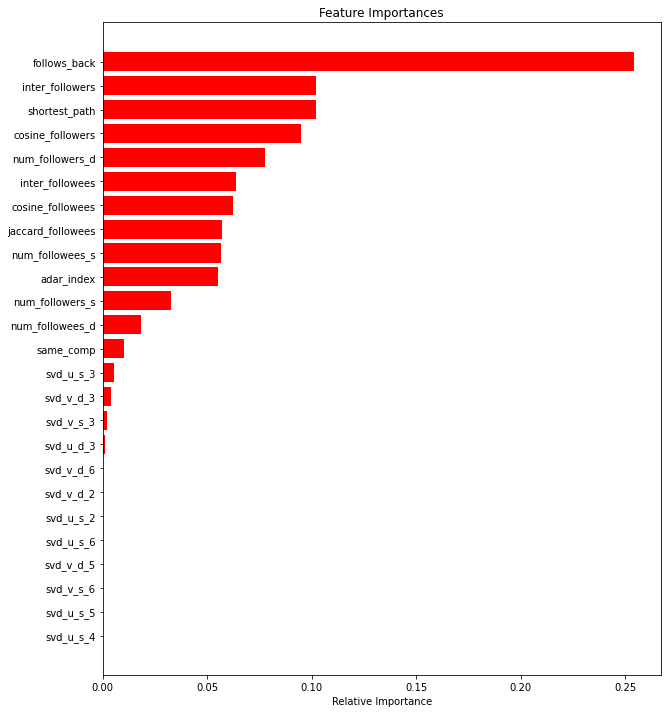

In [63]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2>2. XGBClassifier</h2>

In [65]:
xgb = XGBClassifier()
param_dist = {"n_estimators":[100, 200, 500],
              "max_depth": [3, 5, 7, 10],
              "learning_rate": [0.01, 0.1],
              "subsample": [0.5, 0.7]}


clf = XGBClassifier(random_state=25,n_jobs=-1)

xgb = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='f1',random_state=25, return_train_score = True)

xgb.fit(df_final_train,y_train)
print('mean test scores',xgb.cv_results_['mean_test_score'])
print('mean train scores',xgb.cv_results_['mean_train_score'])

mean test scores [0.97945268 0.96545128 0.98289721 0.97824307 0.98232435]
mean train scores [0.99229152 0.96576843 0.99999001 0.98345957 1.        ]


In [69]:
print(xgb.best_params_)
xgb_hyperparameter = xgb.best_params_

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}


In [67]:
clf = XGBClassifier(learning_rate=xgb.best_params_['learning_rate'], max_depth=xgb.best_params_['max_depth'],
                    n_estimators=xgb.best_params_['n_estimators'], subsample=xgb.best_params_['subsample'], 
                    random_state=25,n_jobs=-1)

In [68]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [71]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
xgb_f1score = f1_score(y_test,y_test_pred)

Train f1 score 0.9999500494510434
Test f1 score 0.8969747238835291


Train confusion_matrix


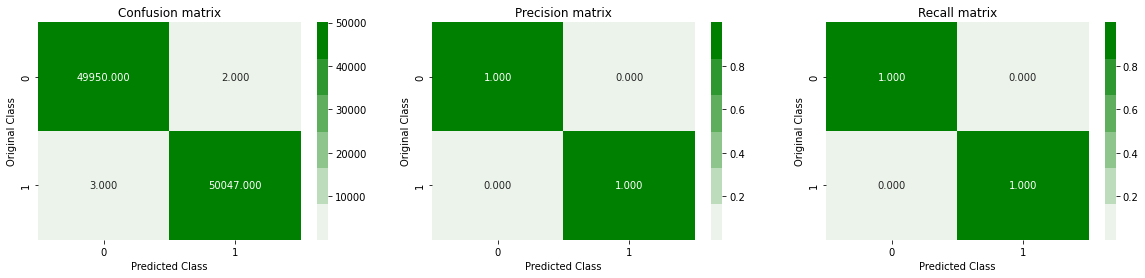

Test confusion_matrix


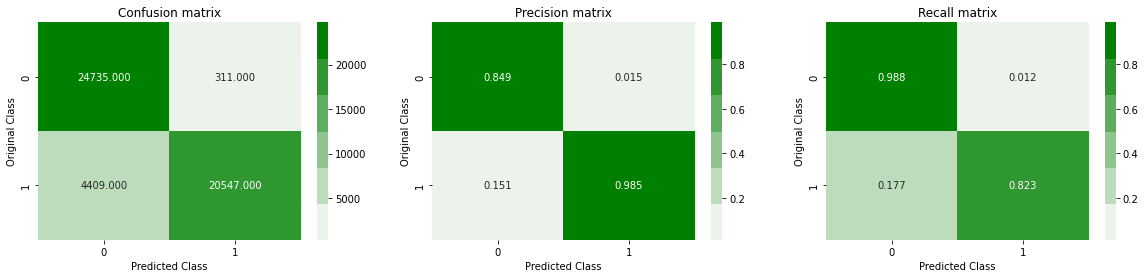

In [72]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

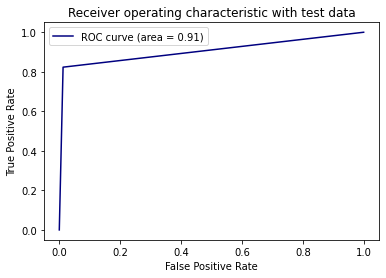

In [73]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

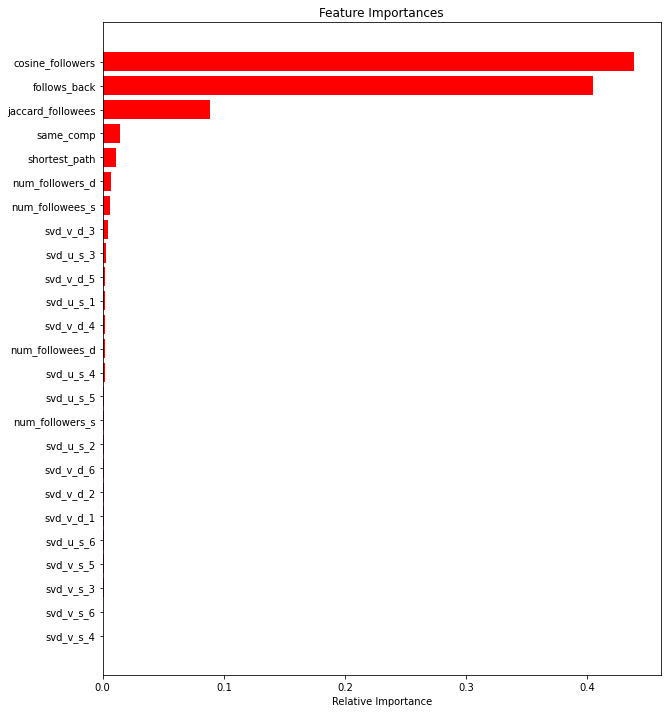

In [74]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2>3. linear SVM</h2>

In [75]:
param_dist = {'alpha' : [10 ** x for x in range(-5, 3)]}


clf = SGDClassifier(class_weight='balanced', penalty='l2', loss='hinge', random_state=42)

lr_svm = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='f1',random_state=84, return_train_score = True)

lr_svm.fit(df_final_train,y_train)
print('mean test scores',lr_svm.cv_results_['mean_test_score'])
print('mean train scores',lr_svm.cv_results_['mean_train_score'])

mean test scores [0.9027308  0.66710207 0.86681011 0.78583603 0.87674246]
mean train scores [0.90290095 0.66710207 0.86694662 0.78566393 0.87621658]


In [77]:
lrsvm_hyperparameter=lr_svm.best_params_['alpha']

In [79]:
clf = SGDClassifier(class_weight='balanced', penalty='l2', loss='hinge', alpha=lrsvm_hyperparameter, random_state=42)

In [80]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [81]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
lrsvm_f1score=f1_score(y_test,y_test_pred)

Train f1 score 0.905037070514683
Test f1 score 0.904277337012763


Train confusion_matrix


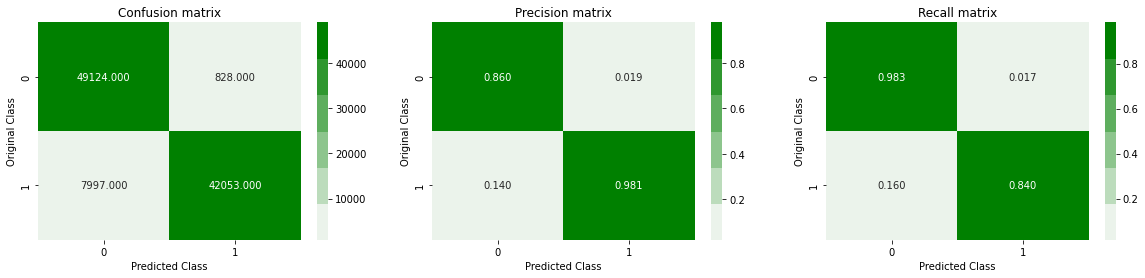

Test confusion_matrix


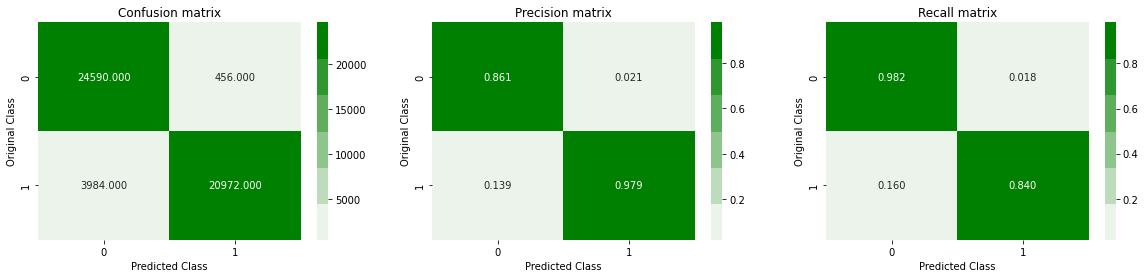

In [82]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

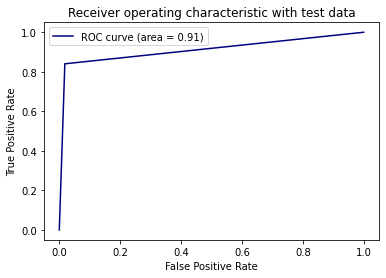

In [83]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

In [86]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Hyperparameter", "f1_score on test data"]

x.add_row(["RandomForestClassifier", rf_hyperparameter , rf_f1score])
x.add_row(["XGBClassifier", xgb_hyperparameter, xgb_f1score])
x.add_row(["Linear SVM", lrsvm_hyperparameter, lrsvm_f1score])

print(x)

+------------------------+------------------------------------------------------------------------------------------+-----------------------+
|         Model          |                                      Hyperparameter                                      | f1_score on test data |
+------------------------+------------------------------------------------------------------------------------------+-----------------------+
| RandomForestClassifier | {'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121} |   0.9258614836190799  |
|     XGBClassifier      |      {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}       |   0.8969747238835291  |
|       Linear SVM       |                                           0.01                                           |   0.904277337012763   |
+------------------------+------------------------------------------------------------------------------------------+-----------------------+
